In [1]:
import numpy as np
from mindaffectBCI.decoder.offline.load_mindaffectBCI import load_mindaffectBCI
from mindaffectBCI.decoder.trigger_check import trigger_check, load_and_trigger_check 
from mindaffectBCI.decoder.preprocess import preprocess_pipeline
from mindaffectBCI.decoder.updateSummaryStatistics import plot_trial
import matplotlib.pyplot as plt
import copy
%matplotlib inline
%load_ext autoreload
%autoreload 2
plt.rcParams['figure.figsize'] = [12, 8] # bigger default figures

Use the file chooser to specify the save file you wish to analyse

In [2]:
# select the file to load
savefile = None # use the most recent file in the logs directory

from tkinter import Tk
from tkinter.filedialog import askopenfilename
import os
root = Tk()
root.withdraw()
savefile = askopenfilename(initialdir=os.getcwd(),
                            title='Chose mindaffectBCI save File',
                            filetypes=(('mindaffectBCI','mindaffectBCI*.txt'),('calibration data','cal*.pk'),('All','*.*')))

# load the raw data

In [5]:
oX, oY, ocoords = load_mindaffectBCI(savefile, stopband=None, fs_out=None, regress=True, sample2timestamp='robust_timestamp_regression')#'lower_bound_tracker')#
# output is: X=eeg, Y=stimulus, coords=meta-info about dimensions of X and Y
print("EEG: X({}){} @{}Hz".format([c['name'] for c in ocoords], oX.shape, ocoords[1]['fs']))                            
print("STIMULUS: Y({}){}".format([c['name'] for c in ocoords[:-1]]+['output'], oY.shape))

Loading C:/Users/Developer/Downloads/mindaffectBCI_audio_predictable_oddball_210716_1444.txt
rewrite for client ip: 192.168.2.11:59782
a=1.0000009349831578 b=-1353142567.5190864
rewrite for client ip: 192.168.2.11:59783
a=0.9999623668399253 b=-1353912868.9643824
Ch: ['']
X=(24802, 8) @250.53238131028436Hz
preFilter: 6th butter NoneHz & downsample 250.53238131028436->NoneHz
resample: 250.53238131028436->250.53238131028436hz rsrate=1
Y=(24802, 3) @250.53238131028436Hz
4 trl_dur (ms) : [15000.01402473 15433.01442957 15000.01402473 15000.01402473]
5 trl_stim : [array([901, 901, 901, 901], dtype=int32)]
Got 4 trials, keeping 4
4 trl_dur (samp): [4906 5014 4906]
4 trl_dur (ms) : [19583.01830983 20017.01871562 19583.01830983]
slicing 4 trials =[-501 - 4083] samples @ 250.53238131028436Hz
EEG: X(['trial', 'time', 'channel'])(4, 4584, 8) @250.53238131028436Hz
STIMULUS: Y(['trial', 'time', 'output'])(4, 4584, 3)


In [6]:
X=oX.copy()
Y=oY.copy()
coords=copy.deepcopy(ocoords)

# preprocess to make the analysis work better

In [7]:
pipeline = [
    ['ButterFilterAndResampler',{'stopband':(1,35,'bandpass')}]
]
Xpp, Ypp, coordspp = preprocess_pipeline(X,Y,coords,pipeline)
print(Xpp.info)

PreprocessPipeline(stages=[('butterfilterandresampler',
                            ButterFilterAndResampler(axis=1, downsample_y='max',
                                                     filter_y=False, fs=None,
                                                     fs_out=None,
                                                     ftype='butter', order=6,
                                                     stopband=(1, 35,
                                                               'bandpass'),
                                                     verb=0))],
                   verb=0)
{'fs': 250.53238131028436, 'ch_names': [''], 'coords': [{'name': 'trial', 'coords': array([5836900.50426197, 5856483.5225718 , 5876500.54128742,
       5896083.55959725]), 'trl_idx': array([[ 4614,  4615,  4616, ...,  9195,  9196,  9197],
       [ 9520,  9521,  9522, ..., 14101, 14102, 14103],
       [14534, 14535, 14536, ..., 19115, 19116, 19117],
       [19440, 19441, 19442, ..., 24021, 24022, 24023

# run the trigger check analysis

EEG: X(['trial', 'time', 'channel'])(4, 4584, 8) @250.53238131028436Hz
STIMULUS: Y(['trial', 'time', 'output'])(4, 4584, 3)
training model
clsfr=MultiCCA(CCA=True, badEpThresh=6, center=True, evtlabs=['re1'],
         fs=250.53238131028436, offset=None, offset_ms=0, outputscore='ip',
         rank=1, rcond=(0.0001, 1e-08), reg=(1e-08, 1e-08), symetric=False,
         tau=None, tau_ms=250, whiten_alg='eigh')
applying spatial filter
W=[-4.8268389e-02 -7.6705642e-04  1.7873012e-01  2.0156326e-03
 -6.1587041e-04  2.2012635e-01 -3.5102946e-01  3.2663105e-05]
slicing data
generating plot
samp2ms=3.9915


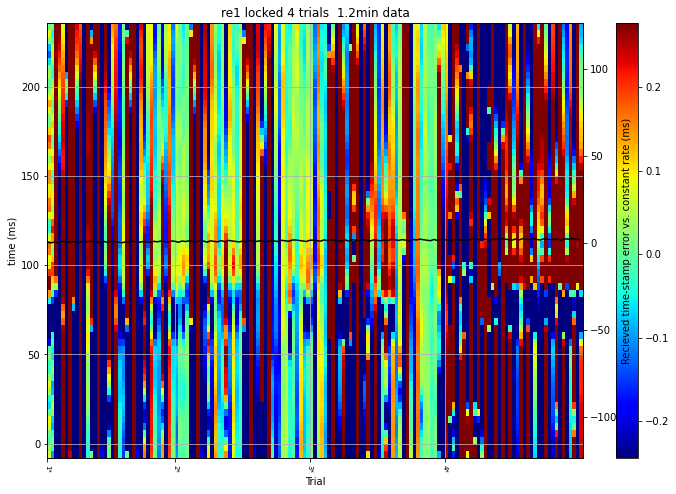

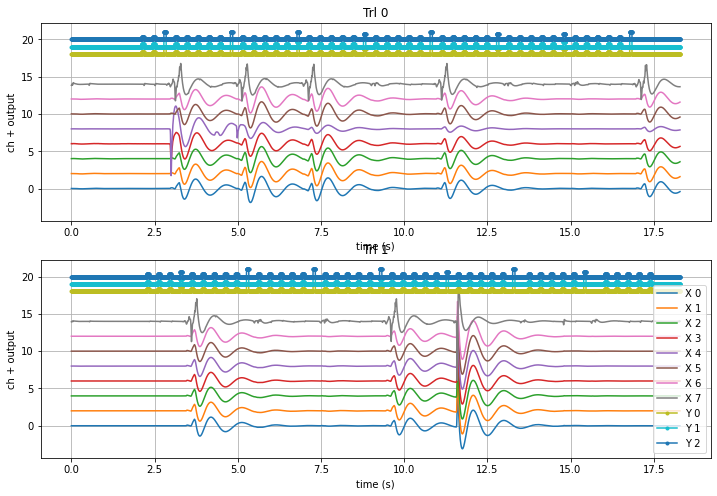

Plot Factored Model
A=(1, 8) R=(1, 1, 62)


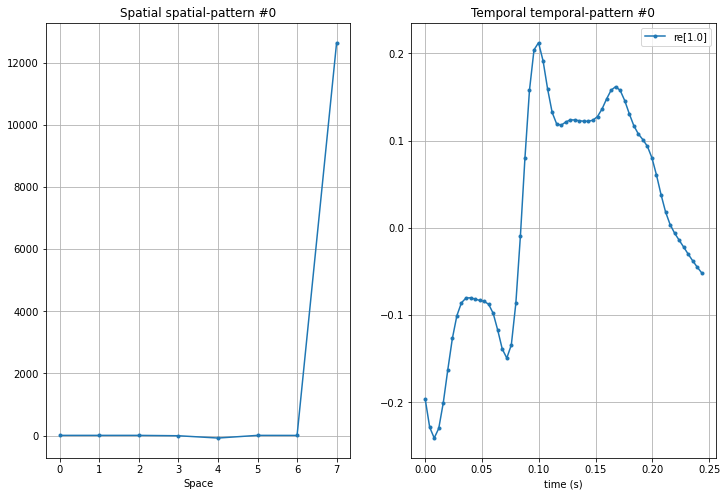

In [26]:
trigger_check(Xpp,Ypp,coords, evtlabs=('re1'), tau_ms=250, offset_ms=-10)

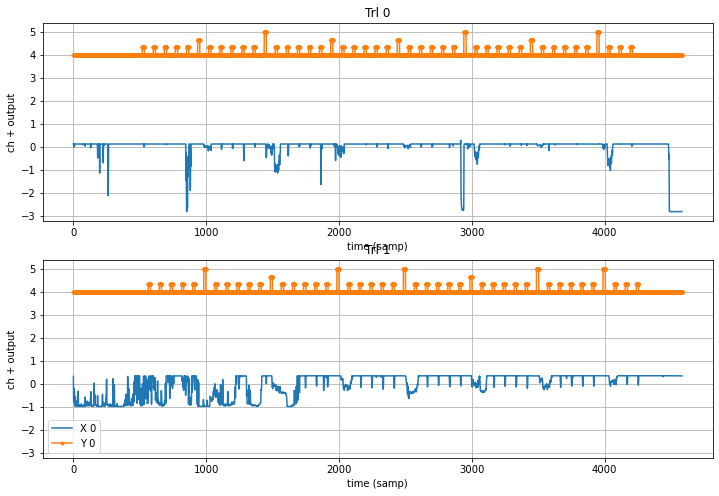

In [27]:
plot_trial(X[-2:,:,-1:],Y[-2:,:,:1])

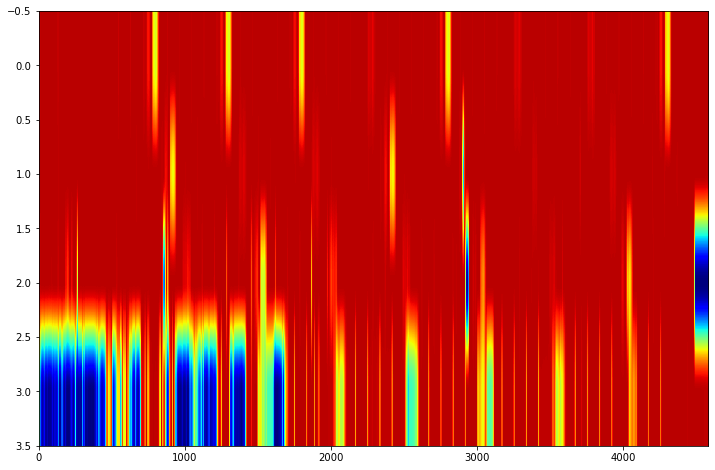

IndexError: index 9 is out of bounds for axis 0 with size 4

In [13]:
plt.imshow(X[:,:,-1],aspect='auto')
plt.show()
plt.plot((Y[9,:,:]+2*np.arange(Y.shape[-1])[np.newaxis,:]))

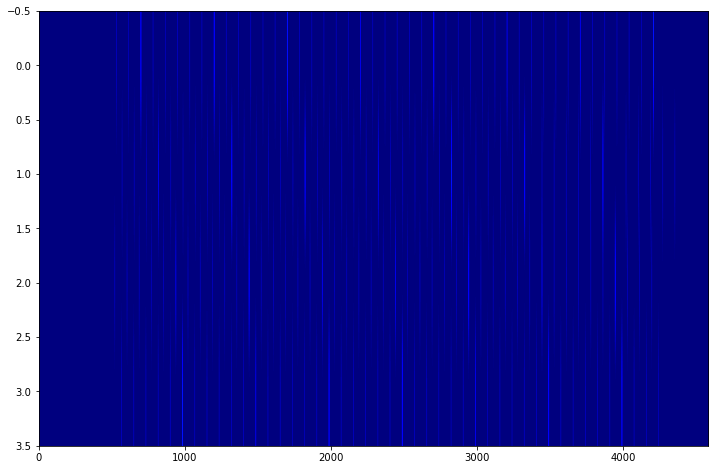

In [21]:
from mindaffectBCI.decoder.stim2event import stim2event
Ye,_,_ = stim2event(Y,evtlabs=('re1','re2','re3'))
plt.imshow(Ye[:,:,0,0],aspect='auto')